# Main code

In [1]:
import os
import numpy as np
import scipy.io
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import sys

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

[sklearn.linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)

[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## Read and preprocess mat files

After reading and preprocessing the data in the next code chunk, the data from all cells is stored in a population dictionary. The dictionary's keys correspond to the cell names, and the values contain the data for each respective cell.

The values in the population dictionary are cell dictionaries with keys being `'axons'`, `'green_dFFMeanValues'`,and `'red_dFFMeanValues'`:

- The value of `'axons'`, e.g., `cell_data_dict['CL090_230515']['axons']` is a 1 dimensional numpy array, of which the length is the number of groups and the elements are 1 dimensional numpy arrays consisting of components belonging to the group.
- The value of `'green_dFFMeanValues'` is a 2 dimensional 3 by 49 numpy array (each cell has 3 rounds, and each round has 8 directions \* 2 time frequencies \* 3 space frequencies = 48 settings plus a extra period so in total there are 49 columns), of which the elements are still 2 dimensional numpy arrays with size being 10 by N (N is the number of components).
- The value of `'red_dFFMeanValues'` is similarly a 2 dimensional 3 by 49 numpy array, of which the elements are still 2 dimensional numpy arrays with size being 10 by 1 (only recording the data at the soma).

In [2]:
root_path = "/content/drive/MyDrive/Fluorescence_Data/FluoData4Fitting_Average"

# Get a list of all the subdirectories: subfolders are viewed as cell names
cell_names = [f for f in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, f))]
# for cell in cell_names:
#     print(cell)

# Create a dictionary with default values
default_value = 0
cell_data_dict = {cell: default_value for cell in cell_names}
# print(cell_data_dict)

file_suffixes = ['green_Axon.mat', 'green_dFFMeanValues.mat', 'red_dFFMeanValues.mat']

for cell in cell_names:
    print(cell)
    file_names = [cell + suffix for suffix in file_suffixes]

    path_ = file_names[0] # green_Axon.mat
    path_ = os.path.join(root_path, cell, path_)
    mat_data = scipy.io.loadmat(path_)
    axons = mat_data['Axons'] # array containing nested arrays/sub-arrays
    # Squeeze the outer array
    axons = np.squeeze(axons, axis=0)
    for i in range(len(axons)):
        # Squeeze the inner array and convert the data type to 'int'
        axons[i] = np.squeeze(axons[i].astype(int), axis=0)
    # final axons' length is the number of groups with
    # each elements being a nested array of components

    path_ = file_names[1] # green_dFFMeanValues.mat
    path_ = os.path.join(root_path, cell, path_)
    mat_data = scipy.io.loadmat(path_)
    dFFMeanValues_green = mat_data['dFFMeanValues'] # 3 by 49

    path_ = file_names[2] # red_dFFMeanValues.mat
    path_ = os.path.join(root_path, cell, path_)
    mat_data = scipy.io.loadmat(path_)
    dFFMeanValues_red = mat_data['dFFMeanValues'] # 3 by 49

    cell_data_dict[cell] = {'axons': axons,
                'green_dFFMeanValues': dFFMeanValues_green,
                'red_dFFMeanValues': dFFMeanValues_red}

# Print keys and types
for key, value in cell_data_dict.items():
    print("-- * * * * * --")
    print(key, type(value))
    for key_, value_ in value.items():
        print(key_, type(value_))
print("-- * * * * * --")

CL090_230515
CL090_230518
CL083_230413
CL075_230303
-- * * * * * --
CL090_230515 <class 'dict'>
axons <class 'numpy.ndarray'>
green_dFFMeanValues <class 'numpy.ndarray'>
red_dFFMeanValues <class 'numpy.ndarray'>
-- * * * * * --
CL090_230518 <class 'dict'>
axons <class 'numpy.ndarray'>
green_dFFMeanValues <class 'numpy.ndarray'>
red_dFFMeanValues <class 'numpy.ndarray'>
-- * * * * * --
CL083_230413 <class 'dict'>
axons <class 'numpy.ndarray'>
green_dFFMeanValues <class 'numpy.ndarray'>
red_dFFMeanValues <class 'numpy.ndarray'>
-- * * * * * --
CL075_230303 <class 'dict'>
axons <class 'numpy.ndarray'>
green_dFFMeanValues <class 'numpy.ndarray'>
red_dFFMeanValues <class 'numpy.ndarray'>
-- * * * * * --


In [3]:
# print to see data type and size
print(cell_data_dict['CL090_230515'].keys())
print(type(cell_data_dict['CL090_230515']['axons']))
print(cell_data_dict['CL090_230515']['axons'].shape)
print(cell_data_dict['CL090_230515']['axons'][1].shape)
print(cell_data_dict['CL090_230515']['axons'][1].dtype)
print("--------------------------------")
print(type(cell_data_dict['CL090_230515']['green_dFFMeanValues']))
print(cell_data_dict['CL090_230515']['green_dFFMeanValues'].shape)
print(type(cell_data_dict['CL090_230515']['green_dFFMeanValues'][1,1]))
print(cell_data_dict['CL090_230515']['green_dFFMeanValues'][0,1].shape)
print(cell_data_dict['CL083_230413']['green_dFFMeanValues'][0,1].shape)
print(cell_data_dict['CL083_230413']['green_dFFMeanValues'][0,1].dtype)
print("--------------------------------")
print(type(cell_data_dict['CL090_230515']['red_dFFMeanValues']))
print(cell_data_dict['CL090_230515']['red_dFFMeanValues'].shape)
print(type(cell_data_dict['CL090_230515']['red_dFFMeanValues'][1,1]))
print(cell_data_dict['CL090_230515']['red_dFFMeanValues'][0,1].shape)
print(cell_data_dict['CL083_230413']['red_dFFMeanValues'][0,1].shape)
print(cell_data_dict['CL083_230413']['red_dFFMeanValues'][0,1].dtype)

dict_keys(['axons', 'green_dFFMeanValues', 'red_dFFMeanValues'])
<class 'numpy.ndarray'>
(25,)
(19,)
int64
--------------------------------
<class 'numpy.ndarray'>
(3, 49)
<class 'numpy.ndarray'>
(10, 281)
(10, 155)
float64
--------------------------------
<class 'numpy.ndarray'>
(3, 49)
<class 'numpy.ndarray'>
(10, 1)
(10, 2)
float64


Note:

- Four cells: `'CL090_230515'`, `'CL090_230518'`, `'CL083_230413'`, `'CL075_230303'`.

- `'red_dFFMeanValues'` and `'green_dFFMeanValues'` have 49 columns,where the last column should be excluded. They are supposed to have 3 rows (3 rounds), but `'CL090_230518'` only has 2 rows.

- In `'CL083_230413'`, elements in `'red_dFFMeanValues'` have 2 columns (10 × 2， should be 10 × 1), so `'CL083_230413'` is not used.

## Fit data to model

### Functions

In [4]:
def plot_comparison(y_test, y_pred, subtitle = ''):
    # Sort y_pred and y_test based on y_test
    sorted_indices = np.argsort(y_test)
    sorted_y_pred = y_pred[sorted_indices]
    sorted_y_test = y_test[sorted_indices]
    # Plot sorted_y_pred and sorted_y_test
    plt.plot(sorted_y_pred, label='Sorted Predictions')
    plt.plot(sorted_y_test, label='Sorted Ground Truth')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Comparison of Sorted Predictions and Sorted Ground Truth \n ({subtitle})')
    plt.legend()
    plt.savefig(f'Comparison ({subtitle}).png', bbox_inches='tight')
    # bbox_inches='tight' will adjust the figure's bounding box to fit all the content, ensuring that
    # the complete words are visible in the saved figure. Otherwise, the saved figure may not show the
    # complete words, e.g., for x-label, or for the long title.
    # The default setting can sometimes result in cutoff or clipped text. It tries to include the entire
    # figure within the saved image, but there may be cases where the default behavior is not sufficient
    # to capture all the content. The default behavior assumes the figure content fits within the predefined
    # margins and padding.
    plt.show()

### Reorganize the data (vstack)

In [6]:
cell_data = cell_data_dict['CL090_230515']
# cell_data = cell_data_dict['CL075_230303']

delete_small_group = True # delete groups (axons) with less than 3 components

data_green = cell_data['green_dFFMeanValues'][:,:-1] # exclude 49th column
data_red = cell_data['red_dFFMeanValues'][:,:-1] # exclude 49th column
data_axons = cell_data['axons']
# print(data_axons)
# print(type(data_axons),len(data_axons),data_axons)
if delete_small_group:
    data_axons = np.array([axons_ for axons_ in data_axons if len(axons_) >= 3], dtype=object)
# print(data_axons)
# print(type(data_axons),len(data_axons),data_axons)

# vstack green data
stacked_green = np.empty((0, data_green[0,0].shape[1]))
# Enumerate the elements in the np array and vstack them
for index, value in np.ndenumerate(data_green):
    stacked_green = np.vstack((stacked_green, value))
print(stacked_green.shape, 48*3*10)

# group columns of green data
group_num = data_axons.shape[0]
group_satcked_green = np.zeros((stacked_green.shape[0], group_num))
for i, cols in enumerate(data_axons):
    group_satcked_green[:, i] = np.sum(stacked_green[:, cols-1], axis=1)
print(group_satcked_green.shape, data_axons.shape)

# vstack red data
stacked_red = np.empty((0, data_red[0,0].shape[1]))
# Enumerate the elements in the np array and vstack them
for index, value in np.ndenumerate(data_red):
    stacked_red = np.vstack((stacked_red, value))
print(stacked_red.shape, 48*3*10)

print(np.max(group_satcked_green), np.min(group_satcked_green))
print(np.max(stacked_red), np.min(stacked_red))

(1440, 281) 1440
(1440, 23) (23,)
(1440, 1) 1440
15.553237533160676 -5.301797778486449
0.6745208147710272 -0.24153973313562027


### Linear regression

#### Divide train and val datasets

In [ ]:
# independent data
x = group_satcked_green

# dependent data (labels/targets)
y = np.squeeze(stacked_red)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1368, 5)
y_train shape: (1368,)
x_test shape: (72, 5)
y_test shape: (72,)


#### Ordinary linear regression

Ordinary least squares Linear Regression.

Linear Regression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

##### Fit and predict

In [ ]:
# Create a LinearRegression object
model = linear_model.LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)
# Print the fitted coefficients
print("Fitted Coefficients:", model.coef_)
# Print the fitted intercept
print("Fitted Intercept:", model.intercept_)

# Predict on the test data
y_pred = model.predict(x_test)

Fitted Coefficients: [ 0.02750133  0.00644773  0.01610286 -0.00245954  0.00325725]
Fitted Intercept: 0.021384507405425024


##### Evaluate

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

Mean squared error: 0.0021013740360479637
Correlation coefficient: 0.5516491307623594
Coefficient of determination (R-squared score, R2 score): 0.30412235302891344


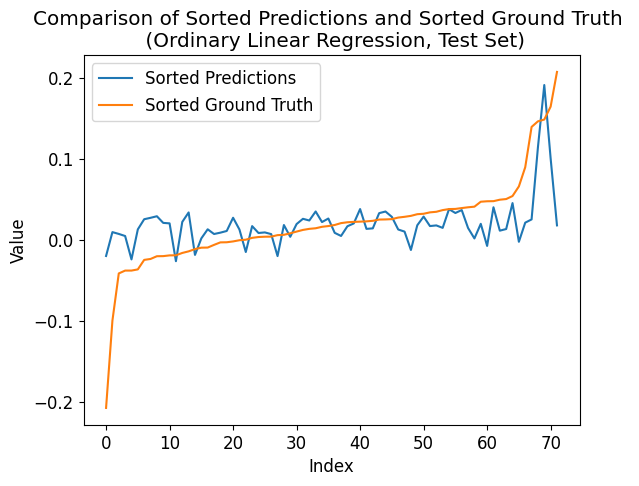

In [ ]:
plot_comparison(y_test, y_pred, 'Ordinary Linear Regression, Test Set')

In [ ]:
# predict on train
# Use the trained model to make predictions
y_pred_ = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_train, y_pred_)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

Mean squared error: 0.0016130542307865325
Correlation coefficient: 0.5303604736894671
Coefficient of determination (R-squared score, R2 score): 0.2812822320521161


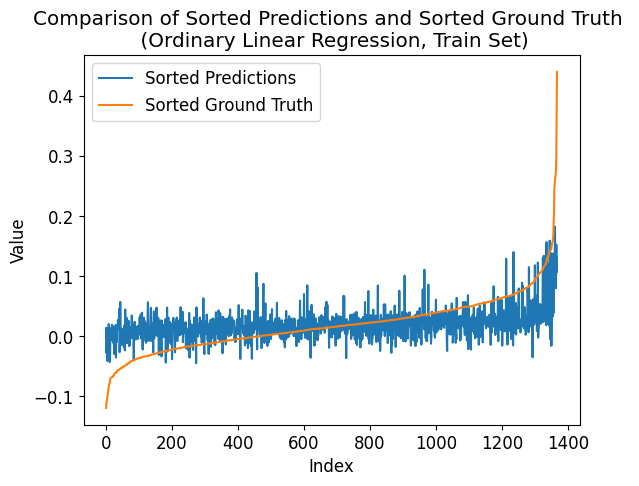

In [ ]:
plot_comparison(y_train, y_pred_, 'Ordinary Linear Regression, Train Set')

In [ ]:
# digitized results
print("---- ---- ----")
class_num = 16
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max
# Generate class_num+1 evenly spaced intervals
intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
y_train_digital = np.digitize(y_train, intervals) - 1
y_test_digital = np.digitize(y_test, intervals) - 1
y_pred_train_digital = np.digitize(y_pred_, intervals) - 1
y_pred_test_digital = np.digitize(y_pred, intervals) - 1
mse = mean_squared_error(y_test_digital, y_pred_test_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_test_digital, y_test_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_test_digital, y_pred_test_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)
mse = mean_squared_error(y_train_digital, y_pred_train_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_train_digital, y_train_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_train_digital, y_pred_train_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

---- ---- ----
Mean squared error: 1.3611111111111112
Correlation coefficient: 0.5192778681631646
Coefficient of determination (R-squared score, R2 score): 0.2679738562091504
Mean squared error: 1.1140350877192982
Correlation coefficient: 0.47374351663713143
Coefficient of determination (R-squared score, R2 score): 0.21872132035869019


#### Ridge linear regression

Linear least squares with l2 regularization.

Minimizes the objective function:

$$
||y - Xw||^2_2 + \alpha  ||w||^2_2
$$

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm.

##### Fit and predict

In [ ]:
# Create a Ridge Regression object
ridge_model = linear_model.Ridge(alpha=1.0)  # You can adjust the value of alpha as per your requirements

# Fit the model on the training data
ridge_model.fit(x_train, y_train)

# Print the fitted coefficients
print("Fitted Coefficients:", ridge_model.coef_)

# Print the fitted intercept
print("Fitted Intercept:", ridge_model.intercept_)

# Predict on the test data
y_pred = ridge_model.predict(x_test)

Fitted Coefficients: [ 0.02737809  0.00640785  0.01592334 -0.00242911  0.00326877]
Fitted Intercept: 0.02141557952594624


##### Evaluate

Mean squared error: 0.0020998258646144365
Correlation coefficient: 0.5521413386329813
Coefficient of determination (R-squared score, R2 score): 0.30463503562410577


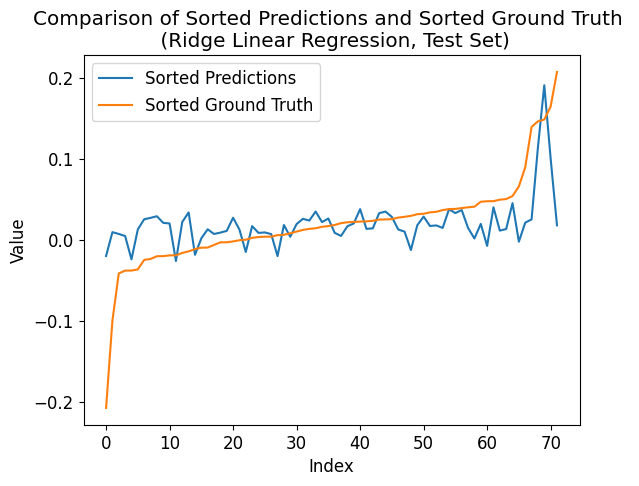

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

plot_comparison(y_test, y_pred, 'Ridge Linear Regression, Test Set')

Mean squared error: 0.0016130590000993249
Correlation coefficient: 0.5303588713620216
Coefficient of determination (R-squared score, R2 score): 0.2812801070213643


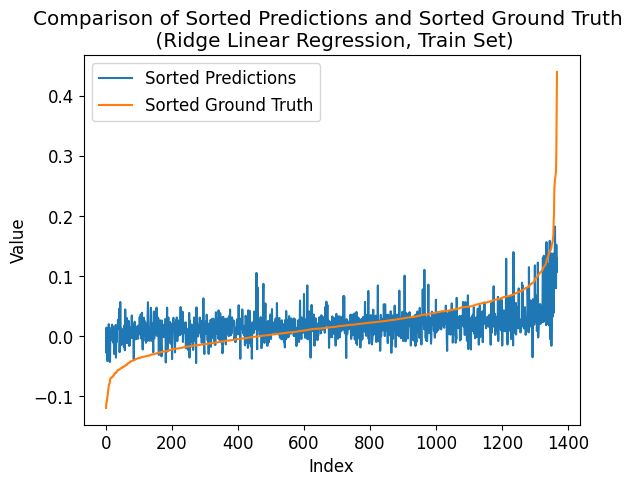

In [ ]:
# predict on train
# Use the trained model to make predictions
y_pred_ = ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_train, y_pred_)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

plot_comparison(y_train, y_pred_, 'Ridge Linear Regression, Train Set')

In [ ]:
# digitized results
print("---- ---- ----")
class_num = 16
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max
# Generate class_num+1 evenly spaced intervals
intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
y_train_digital = np.digitize(y_train, intervals) - 1
y_test_digital = np.digitize(y_test, intervals) - 1
y_pred_train_digital = np.digitize(y_pred_, intervals) - 1
y_pred_test_digital = np.digitize(y_pred, intervals) - 1
mse = mean_squared_error(y_test_digital, y_pred_test_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_test_digital, y_test_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_test_digital, y_pred_test_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)
mse = mean_squared_error(y_train_digital, y_pred_train_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_train_digital, y_train_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_train_digital, y_pred_train_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

---- ---- ----
Mean squared error: 1.3611111111111112
Correlation coefficient: 0.5192778681631646
Coefficient of determination (R-squared score, R2 score): 0.2679738562091504
Mean squared error: 1.1103801169590644
Correlation coefficient: 0.47591543732849056
Coefficient of determination (R-squared score, R2 score): 0.22128457061998064


#### ElasticNet linear regression

Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function:

$$
1 / (2 * n_{samples}) * ||y - Xw||^2_2
+ \alpha * l1_{ratio} * ||w||_1
+ 0.5 * \alpha * (1 - l1_{ratio}) * ||w||^2_2
$$

If controlling the L1 and L2 penalty separately, that this is equivalent to:

$$
a * ||w||_1 + 0.5 * b * ||w||_2^2
$$

where: $\alpha = a + b$ and $l1_{ratio} = a / (a + b)$.

##### Fit and predict

In [ ]:
# Create an ElasticNet object
a = 0.004; b = 0.00
alpha = a + b; l1_ratio = a / (a + b)
elasticnet_model = linear_model.ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=100000)
# adjust the values of alpha and l1_ratio as per your requirements

# Fit the model on the training data
elasticnet_model.fit(x_train, y_train)

# Print the fitted coefficients
print("Fitted Coefficients:", elasticnet_model.coef_)

# Print the fitted intercept
print("Fitted Intercept:", elasticnet_model.intercept_)

# Predict on the test data
y_pred = elasticnet_model.predict(x_test)

# It is normal to encounter warning here, because our data is not linear enough
# and not normailized to guarantee a low error/residual, even though we set a very
# large max_iter. But the results is similar to that of ordinary and Ridge linear
# regression. Like alpha = 0 results in the same results as the ordinary linear
# rergession.

Fitted Coefficients: [0.00866444 0.         0.         0.00158259 0.0047032 ]
Fitted Intercept: 0.022844047405427618


##### Evaluate

Mean squared error: 0.0020020605564851465
Correlation coefficient: 0.6136634710485406
Coefficient of determination (R-squared score, R2 score): 0.33701037262235


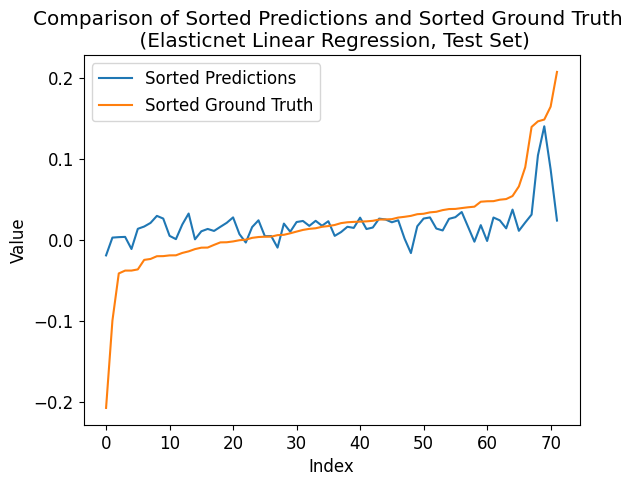

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

plot_comparison(y_test, y_pred, 'Elasticnet Linear Regression, Test Set')

Mean squared error: 0.0016981988382008856
Correlation coefficient: 0.4970722873576219
Coefficient of determination (R-squared score, R2 score): 0.2433449197003772


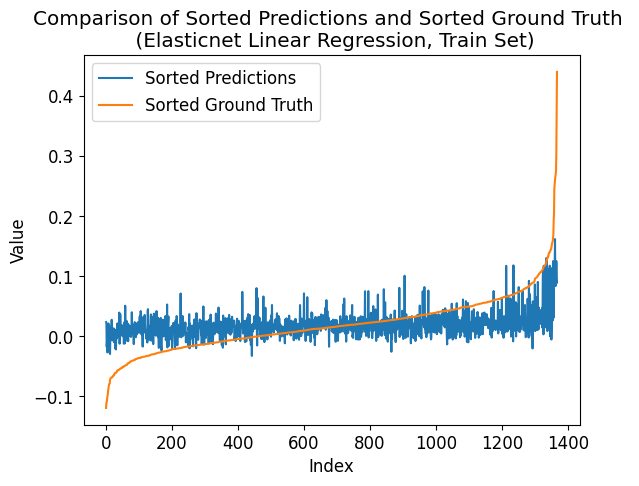

In [ ]:
# predict on train
# Use the trained model to make predictions
y_pred_ = elasticnet_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_train, y_pred_)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

plot_comparison(y_train, y_pred_, 'Elasticnet Linear Regression, Train Set')

In [ ]:
# digitized results
print("---- ---- ----")
class_num = 16
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max
# Generate class_num+1 evenly spaced intervals
intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
y_train_digital = np.digitize(y_train, intervals) - 1
y_test_digital = np.digitize(y_test, intervals) - 1
y_pred_train_digital = np.digitize(y_pred_, intervals) - 1
y_pred_test_digital = np.digitize(y_pred, intervals) - 1
mse = mean_squared_error(y_test_digital, y_pred_test_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_test_digital, y_test_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_test_digital, y_pred_test_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)
mse = mean_squared_error(y_train_digital, y_pred_train_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_train_digital, y_train_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_train_digital, y_pred_train_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

---- ---- ----
Mean squared error: 1.3472222222222223
Correlation coefficient: 0.5463431384225381
Coefficient of determination (R-squared score, R2 score): 0.2754435107376284
Mean squared error: 1.1359649122807018
Correlation coefficient: 0.4511357285754583
Coefficient of determination (R-squared score, R2 score): 0.20334181879094793


### Power-law regression

Mathematically, a power-law relationship can be expressed as:

$$
y = A  X^C
$$

Here, I modify it, shown as:

$$
y = A  (X+B)^C + D
$$

where, $X = \beta_1 x_1 + \beta_2 x_2 \dots + \beta_N x_N$. $X+D$ is a linear regression part. $A$, $B$, $C$, $D$, $\beta_1$, $\beta_2$, ...,$\beta_N$ are parameters to be determined.

#### Divide train and val datasets

In [ ]:
# independent data
x = group_satcked_green

# dependent data (labels/targets)
y = np.squeeze(stacked_red)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1368, 5)
y_train shape: (1368,)
x_test shape: (72, 5)
y_test shape: (72,)


#### Fit, predict and evaluate (Example 1)

Fitted Parameters: [ 1.18600565e+01  3.44121000e-01 -4.05562036e-02  2.77702818e-02
  2.47117908e-03  2.09451252e-02 -2.56362694e-03  3.66822262e-03]
Mean squared error: 0.0026229360598610057
Correlation coefficient: 0.47446924924518413
Coefficient of determination (R-squared score, R2 score): 0.13140519384906468


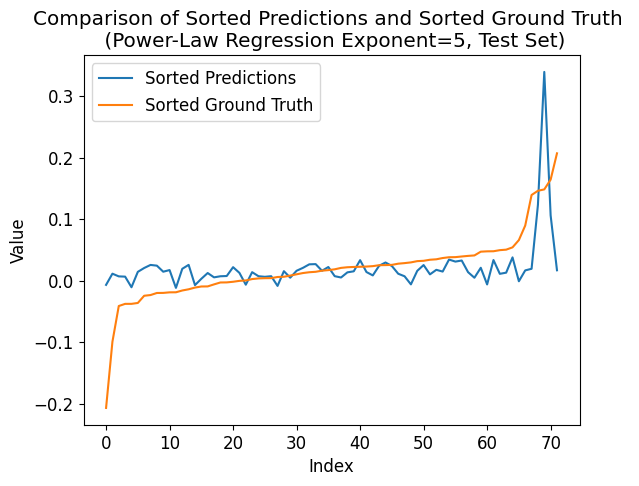

Mean squared error: 0.001563847057598201
Correlation coefficient: 0.550642481932762
Coefficient of determination (R-squared score, R2 score): 0.30320714257648085


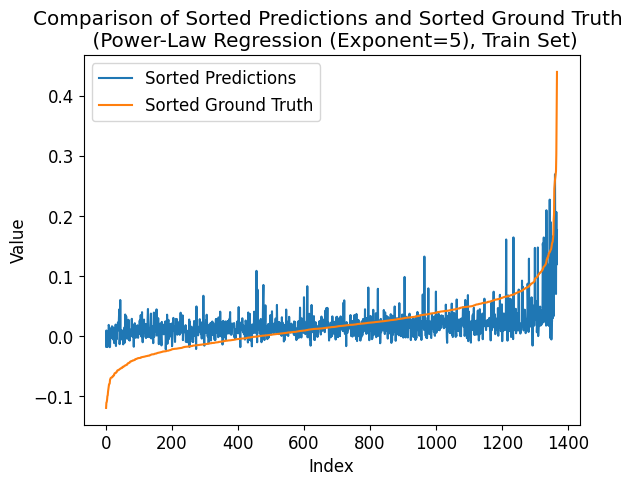

---- ---- ----
Mean squared error: 1.7083333333333333
Correlation coefficient: 0.45098751419685795
Coefficient of determination (R-squared score, R2 score): 0.08123249299719892
Mean squared error: 1.1001461988304093
Correlation coefficient: 0.4832959693241634
Coefficient of determination (R-squared score, R2 score): 0.22846167135159368


In [ ]:
exponent = 5
# Define the model function
def func(X, *params):
    A, B, D = params[:3]
    # Compute the weighted sum
    weighted_sum = np.sum(X * np.array(params[3:]), axis=1)
    base = weighted_sum + B
    power_result = np.power(base, exponent)
    return A * power_result + D

# Create a LinearRegression object
model = linear_model.LinearRegression()

# give the initial params using linear regression
# so that the params are within a reasonable range
model.fit(x_train, y_train)
# print("Fitted Coefficients:", model.coef_)
# print("Fitted Intercept:", model.intercept_)
num_features = x_train.shape[1]
# Assuming model.coef_ is the np array containing the coefficients
model_coefs = model.coef_
# Set negative elements to 0 using np.clip()
initial_params = [1, model.intercept_, 0] + list(model_coefs) # Initial parameter guesses
# model_coefs_clipped = np.clip(model_coefs, 0, np.inf)
# initial_params = [1, model.intercept_, 0] + list(model_coefs_clipped) # Initial parameter guesses, no need to clip -- they can be negative

# Set lower and upper bounds for the parameters
lower_bounds = [0, -np.inf, -np.inf] + [0] * num_features
upper_bounds = [np.inf, np.inf, np.inf] + [np.inf] * num_features

# Combine the lower and upper bounds into a 2-tuple of array_like
bounds = (lower_bounds, upper_bounds)

# Perform the curve fit with bounds
params, params_covariance = curve_fit(func, x_train, y_train, p0=initial_params, maxfev=1000000)
# params, params_covariance = curve_fit(func, x_train, y_train, p0=initial_params, bounds=bounds, maxfev=1000000)

# Print the fitted parameters
print("Fitted Parameters:", params)

# predict on test
A, B, D = params[:3]
weighted_sum = np.sum(x_test * np.array(params[3:]), axis=1)
base = weighted_sum + B
abs_base = np.abs(base)
sign = np.sign(base)
power_result = np.power(abs_base, exponent)
y_pred = A * sign * power_result + D

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

plot_comparison(y_test, y_pred, 'Power-Law Regression Exponent=5, Test Set')


# predict on train
A, B, D = params[:3]
weighted_sum = np.sum(x_train * np.array(params[3:]), axis=1)
base = weighted_sum + B
abs_base = np.abs(base)
sign = np.sign(base)
power_result = np.power(abs_base, exponent)
y_pred_ = A * sign * power_result + D

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_train, y_pred_)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

plot_comparison(y_train, y_pred_, 'Power-Law Regression (Exponent=5), Train Set')

# digitized results
print("---- ---- ----")
class_num = 16
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max
# Generate class_num+1 evenly spaced intervals
intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
y_train_digital = np.digitize(y_train, intervals) - 1
y_test_digital = np.digitize(y_test, intervals) - 1
y_pred_train_digital = np.digitize(y_pred_, intervals) - 1
y_pred_test_digital = np.digitize(y_pred, intervals) - 1
mse = mean_squared_error(y_test_digital, y_pred_test_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_test_digital, y_test_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_test_digital, y_pred_test_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)
mse = mean_squared_error(y_train_digital, y_pred_train_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_train_digital, y_train_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_train_digital, y_pred_train_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

#### Fit, predict and evaluate (Example 2)

Fitted Coefficients: [ 0.02750133  0.00644773  0.01610286 -0.00245954  0.00325725]
Fitted Intercept: 0.021384507405425024
Fitted Parameters: [4.05181437e+03 1.77237254e-02]
Mean squared error: 0.005299362470883888
Correlation coefficient: 0.2996981978301417
Coefficient of determination (R-squared score, R2 score): -0.7549031364359122


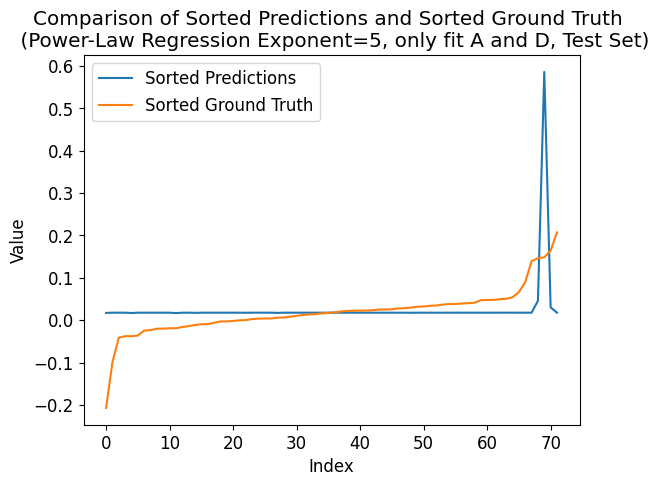

Mean squared error: 0.001978769231784402
Correlation coefficient: 0.3439957106418279
Coefficient of determination (R-squared score, R2 score): 0.1183330489399761


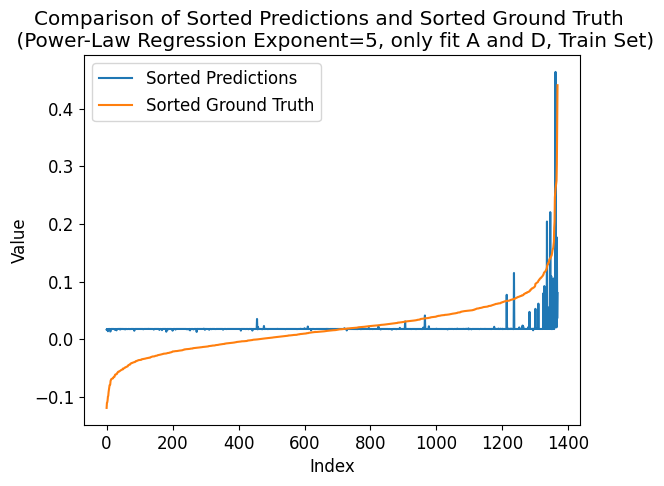

In [ ]:
# compared with example 1, here only fit A and D.

exponent = 5

model = linear_model.LinearRegression()
model.fit(x_train, y_train)
# now we have: model.intercept_ and model.coef_
# Print the fitted coefficients
print("Fitted Coefficients:", model.coef_)
# Print the fitted intercept
print("Fitted Intercept:", model.intercept_)

# Define the model function
def func(X, A, D):
    # Compute the weighted sum
    weighted_sum = np.sum(X * np.array(model.coef_), axis=1)
    base = weighted_sum
    power_result = np.power(base, exponent)
    return A * power_result + D

initial_params = [1, 0]

# Perform the curve fit
params, params_covariance = curve_fit(func, x_train, y_train, p0=initial_params, maxfev=1000000)

# Print the fitted parameters
print("Fitted Parameters:", params)


# predict on test
A, D = params
y_pred = func(x_test, A, D)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

plot_comparison(y_test, y_pred, 'Power-Law Regression Exponent=5, only fit A and D, Test Set')

# predict on train
A, D = params
y_pred_ = func(x_train, A, D)

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_train, y_pred_)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

plot_comparison(y_train, y_pred_, 'Power-Law Regression Exponent=5, only fit A and D, Train Set')

#### Fit and predict

158/99
63/17
87/11
390/43


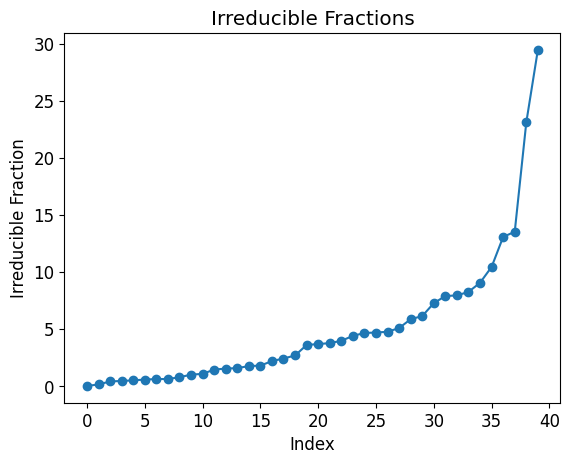

In [ ]:
# generate irreducible fraction with an odd number as the denominator
# such numbers can work as the exponent for negative numbers and
# will be used as the parameter "C" in Power-law regression below:
# y = A * (B+b1*x1+b2*x2+...+bN*xN)**C + D

def gcd(a, b): # calculate the greatest common divisor of two numbers
    while b:
        a, b = b, a % b
    return a

def generate_irreducible_fraction(existing_fractions = []):
    while True:
        numerator = random.randint(1, 400)  # Random numerator
        denominator = random.randrange(1, 100, 2)  # Random odd denominator
        if gcd(numerator, denominator) == 1:  # Check if the fraction is irreducible
            fraction = (numerator, denominator)
            if fraction not in existing_fractions:  # Check if the fraction is not a duplicate
                return fraction

# Generate irreducible fraction numbers
N_faction = 40
upper_bound = 50
irreducible_fractions = []
while len(irreducible_fractions) < N_faction:
    fraction = generate_irreducible_fraction(irreducible_fractions)
    if fraction[0]/fraction[1] < upper_bound:
        irreducible_fractions.append(fraction)

# Sort the irreducible fractions
irreducible_fractions.sort(key=lambda f: f[0] / f[1])

# Print the irreducible fraction numbers
for numerator, denominator in irreducible_fractions:
    if random.random() <= 0.1:
        print(f"{numerator}/{denominator}")


# Extract the numerator and denominator values
indexes = range(1, len(irreducible_fractions) + 1)
values = [numerator / denominator for numerator, denominator in irreducible_fractions]

# Plot the irreducible fractions
plt.plot(values, 'o-')
plt.xlabel("Index")
plt.ylabel("Irreducible Fraction")
plt.title("Irreducible Fractions")
plt.show()

## if not use the above random generated irreducible_fractions, define it below.
irreducible_fractions = [(1,95), (30,43), (179,65), (5,1), (221,33), (219,23), (300,17), (73,3)]

In [ ]:
# # old code! The new one is in the next chunk.

# params_list = []
# for numerator, denominator in irreducible_fractions:
#     C1, C2 = numerator, denominator

#     # Define the model function
#     def func(X, *params):
#         A, B, D = params[:3]
#         # Compute the weighted sum
#         weighted_sum = np.sum(X * np.array(params[3:]), axis=1)
#         base = weighted_sum + B
#         abs_base = np.abs(base)
#         sign = np.sign(base)
#         power_result = np.power(abs_base, C1 / C2)
#         return A * sign * power_result + D

#     # Create a LinearRegression object
#     model = linear_model.LinearRegression()

#     # give the initial params using linear regression
#     # so that the params are within a reasonable range
#     model.fit(x_train, y_train)
#     # print("Fitted Coefficients:", model.coef_)
#     # print("Fitted Intercept:", model.intercept_)
#     num_features = x_train.shape[1]
#     initial_params = [1, model.intercept_, 0] + list(model.coef_) # Initial parameter guesses

#     # Perform the curve fit
#     params, params_covariance = curve_fit(func, x_train, y_train, p0=initial_params, maxfev=1000000)
#     params_list.append(params)

#     # Print the fitted parameters
#     # print("Fitted Parameters:", params)

# # predict on test
# y_predict_test_list = []
# for (numerator, denominator), params in zip(irreducible_fractions, params_list):
#     C1, C2 = numerator, denominator
#     A, B, D = params[:3]
#     weighted_sum = np.sum(x_test * np.array(params[3:]), axis=1)
#     base = weighted_sum + B
#     abs_base = np.abs(base)
#     sign = np.sign(base)
#     power_result = np.power(abs_base, C1 / C2)
#     y_pred = A * sign * power_result + D
#     y_predict_test_list.append(y_pred)

# # predict on train
# y_predict_train_list = []
# for (numerator, denominator), params in zip(irreducible_fractions, params_list):
#     C1, C2 = numerator, denominator
#     A, B, D = params[:3]
#     weighted_sum = np.sum(x_train * np.array(params[3:]), axis=1)
#     base = weighted_sum + B
#     abs_base = np.abs(base)
#     sign = np.sign(base)
#     power_result = np.power(abs_base, C1 / C2)
#     y_pred_ = A * sign * power_result + D
#     y_predict_train_list.append(y_pred_)

In [ ]:
# new code, a updated version for the code in last chunk.
# input and output data normalization is achieved (but it
# seems normalization is redundant).

class CurveFit_with_Normalization:
    def __init__(self, exponent_numerator=1, exponent_denominator=1, input_range=[1,2], output_range=[1,2]):
        self.input_min = input_range[0]
        self.input_max = input_range[1]
        self.output_min = output_range[0]
        self.output_max = output_range[1]
        self.input_scale = None
        self.input_shift = None
        self.output_scale = None
        self.output_shift = None
        self.exponent_numerator = exponent_numerator
        self.exponent_denominator = exponent_denominator
        self.linear_model = linear_model.LinearRegression()

    def fit(self, X, y):
        # Normalize the input and output data
        self.input_scale = (self.input_max - self.input_min) / (np.max(X) - np.min(X))
        self.input_shift = self.input_min - np.min(X) * self.input_scale
        normalized_X = self.input_scale * X + self.input_shift

        self.output_scale = (self.output_max - self.output_min) / (np.max(y) - np.min(y))
        self.output_shift = self.output_min - np.min(y) * self.output_scale
        normalized_y = self.output_scale * y + self.output_shift

        def normalized_func_(X_normalize, *params):
            A, B, D = params[:3]
            # Compute the weighted sum
            weighted_sum = np.sum(X_normalize * np.array(params[3:]), axis=1)
            base = weighted_sum + B
            abs_base = np.abs(base)
            sign = np.sign(base)
            power_result = np.power(abs_base, self.exponent_numerator / self.exponent_denominator)
            return A * sign * power_result + D

        # Give the initial params using linear regression
        self.linear_model.fit(normalized_X, normalized_y)
        # print("Fitted Coefficients:", linear_model.coef_)
        # print("Fitted Intercept:", linear_model.intercept_)
        # num_features = X.shape[1]
        exponent = self.exponent_numerator / self.exponent_denominator
        initial_params = [1, self.linear_model.intercept_ / exponent + (1 - 1 / exponent), 0] + list(self.linear_model.coef_ /
                        exponent)  # Initial parameter guesses
        # initial_params = [1, 0, 0] + [1 / X.shape[1]] * (X.shape[1])

        # Perform the normalized curve fit
        normalized_params, params_covariance = curve_fit(normalized_func_, normalized_X, normalized_y,
                                  p0=initial_params, maxfev=100000000)

        # Store the fitted parameters
        self.normalized_fitted_params = normalized_params

    def predict(self, X):
        # Normalize the input data using the previously calculated scaling and shifting parameters
        normalized_X = self.input_scale * X + self.input_shift

        # Make predictions using the denormalized parameters
        y_pred = self.normalized_func(normalized_X, self.exponent_numerator,
                              self.exponent_denominator, *self.normalized_fitted_params)

        # Denormalize the predicted output
        y_pred = (y_pred - self.output_shift) / self.output_scale

        return y_pred

    @staticmethod
    def normalized_func(X_normalize, exponent_numerator, exponent_denominator, *params):
        A, B, D = params[:3]
        # Compute the weighted sum
        weighted_sum = np.sum(X_normalize * np.array(params[3:]), axis=1)
        base = weighted_sum + B
        abs_base = np.abs(base)
        sign = np.sign(base)
        power_result = np.power(abs_base, exponent_numerator / exponent_denominator)
        return A * sign * power_result + D

model_list = []
for numerator, denominator in irreducible_fractions:
    # Create an instance of NormalizedCurveFit
    model = CurveFit_with_Normalization(numerator, denominator, input_range=[1, 2], output_range=[1, 2])

    # Fit the model to your input and output data
    model.fit(x_train, y_train)

    model_list.append(model)


-------- 
 (numerator, denominator) is: (1, 95)
Mean squared error: 0.002100964640127741
Correlation coefficient: 0.5517910432357731
Coefficient of determination (R-squared score, R2 score): 0.3042579259753555
-------- 
 (numerator, denominator) is: (30, 43)
Mean squared error: 0.002101281865505407
Correlation coefficient: 0.5516808169870028
Coefficient of determination (R-squared score, R2 score): 0.30415287563896487
-------- 
 (numerator, denominator) is: (179, 65)
Mean squared error: 0.0025250507543628977
Correlation coefficient: 0.4832436056815392
Coefficient of determination (R-squared score, R2 score): 0.16382026841198005
-------- 
 (numerator, denominator) is: (5, 1)
Mean squared error: 0.0026225156812671405
Correlation coefficient: 0.47450623106504053
Coefficient of determination (R-squared score, R2 score): 0.13154440374778698
-------- 
 (numerator, denominator) is: (221, 33)
Mean squared error: 0.0026499746952767882
Correlation coefficient: 0.4722949272041147
Coefficient of d

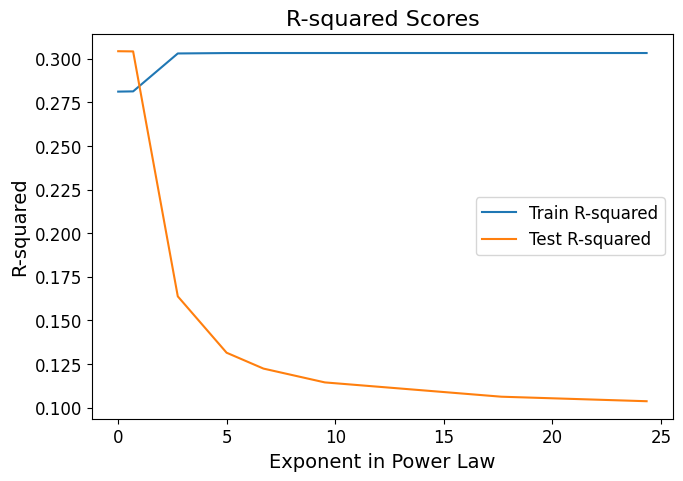

In [ ]:
# this is for the new version code in the last chunk

r2_score_test_list = []

# predict on test
y_predict_test_list = []
for model, (numerator, denominator) in zip(model_list, irreducible_fractions):
    y_pred = model.predict(x_test)

    print(f'-------- \n (numerator, denominator) is: ({numerator}, {denominator})')

    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error:", mse)

    correlation = np.corrcoef(y_pred, y_test)[0, 1]
    print("Correlation coefficient:", correlation)

    r_squared = r2_score(y_test, y_pred)
    print("Coefficient of determination (R-squared score, R2 score):", r_squared)

    r2_score_test_list.append(r_squared)

    y_predict_test_list.append(y_pred)

print("|||||||||||||||||||||||||||||||||||||")

r2_score_train_list = []

# predict on train
y_predict_train_list = []
for model, (numerator, denominator) in zip(model_list, irreducible_fractions):
    y_pred_ = model.predict(x_train)

    print(f'-------- \n (numerator, denominator) is: ({numerator}, {denominator})')

    mse = mean_squared_error(y_train, y_pred_)
    print("Mean squared error:", mse)

    # Calculate the correlation coefficient
    correlation = np.corrcoef(y_pred_, y_train)[0, 1]
    print("Correlation coefficient:", correlation)

    r_squared = r2_score(y_train, y_pred_)
    print("Coefficient of determination (R-squared score, R2 score):", r_squared)

    r2_score_train_list.append(r_squared)

    y_predict_train_list.append(y_pred_)


x = [numerator / denominator for (numerator, denominator) in irreducible_fractions]



# plot the r2 score curve over exponent
fig, ax = plt.subplots(figsize=(7.5, 5))  # Adjust the values as desired

# Plot the R-squared scores
ax.plot(x, r2_score_train_list, label='Train R-squared')
ax.plot(x, r2_score_test_list, label='Test R-squared')

# Set labels and title with font size
ax.set_xlabel('Exponent in Power Law', fontsize=14)
ax.set_ylabel('R-squared', fontsize=14)
ax.set_title('R-squared Scores', fontsize=16)

# Set tick label font size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Set legend
ax.legend(fontsize=12)

fig.savefig('Power_Law_r2_scores_plot.png')

# Display the plot
plt.show()

In [ ]:
# for model in model_list:
#     print(model.exponent_numerator, model.exponent_denominator)

#### Evaluate

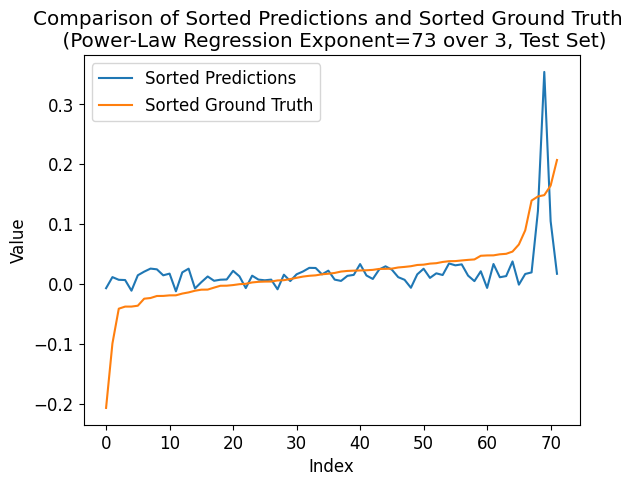

-0.0068363855310673224


In [ ]:
# both the old and new versions (in the last subsection "Fit and predict") of code
# share the same evaluate code in this subsectoon.

# Create and update multiple figures (test)
for y_pred, (numerator, denominator) in zip(y_predict_test_list, irreducible_fractions):
    plot_comparison(y_test, y_pred, f'Power-Law Regression Exponent={numerator} over {denominator}, Test Set')
    # here pay attention: cannot use / replace over in the name, otherwise cannot save the fig
    # because / cannot be in a file name.
    print(y_pred[0])
    clear_output(wait=True)  # Clear the previous output

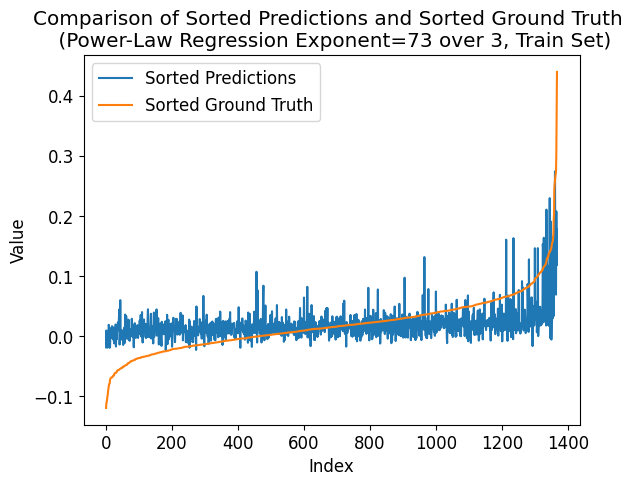

-0.006264150549880837


In [ ]:
# Create and update multiple figures (train)
for y_pred_, (numerator, denominator) in zip(y_predict_train_list, irreducible_fractions):
    plot_comparison(y_train, y_pred_, f'Power-Law Regression Exponent={numerator} over {denominator}, Train Set')
    print(y_pred_[0])
    clear_output(wait=True)  # Clear the previous output

### Exponential regression

Let $B = (b_1, b_2, \ldots , b_N)$.
$$
y = A \cdot e^{(b_1 \cdot x_1 + \ldots + b_N \cdot x_N)} + C
$$

#### Divide train and val datasets

In [ ]:
# independent data
x = group_satcked_green

# dependent data (labels/targets)
y = np.squeeze(stacked_red)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1368, 5)
y_train shape: (1368,)
x_test shape: (72, 5)
y_test shape: (72,)


#### Fit and predict

In [ ]:
# Define the model function
def func(X, *params):
    A, C = params[:2]
    return A * np.exp(np.sum(X * np.array(params[2:]), axis=1)) + C

# give the initial params using linear regression
# so that the params are within a reasonable range
num_features = x_train.shape[1]
initial_params = [np.mean(y_train), 0] + [0] * num_features # Initial parameter guesses

# Perform the curve fit
params, params_covariance = curve_fit(func, x_train, y_train, p0=initial_params, maxfev=1000000)

# Print the fitted parameters
print("Fitted Parameters:", params)

# predict on test
A, C = params[:2]
y_pred = A * np.exp(np.sum(x_test * np.array(params[2:]), axis=1)) + C

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

# predict on train
A, C = params[:2]
y_pred_ = A * np.exp(np.sum(x_train * np.array(params[2:]), axis=1)) + C

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_train, y_pred_)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

r2_score_train_list.append(r_squared)

# digitized results
print("---- ---- ----")
class_num = 16
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max
# Generate class_num+1 evenly spaced intervals
intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
y_train_digital = np.digitize(y_train, intervals) - 1
y_test_digital = np.digitize(y_test, intervals) - 1
y_pred_train_digital = np.digitize(y_pred_, intervals) - 1
y_pred_test_digital = np.digitize(y_pred, intervals) - 1
print(y_pred)
print(y_pred_test_digital)
mse = mean_squared_error(y_test_digital, y_pred_test_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_test_digital, y_test_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_test_digital, y_pred_test_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)
mse = mean_squared_error(y_train_digital, y_pred_train_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_train_digital, y_train_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_train_digital, y_pred_train_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

Fitted Parameters: [ 0.07779241 -0.06104678  0.29536653  0.02428094  0.22627202 -0.02735473
  0.03966839]
Mean squared error: 0.002726635527392822
Correlation coefficient: 0.466554602832389
Coefficient of determination (R-squared score, R2 score): 0.09706473840405994
Mean squared error: 0.0015638339543745966
Correlation coefficient: 0.5506477829720628
Coefficient of determination (R-squared score, R2 score): 0.3032129808920452
---- ---- ----
[-0.00689957 -0.00666178  0.01360607  0.00661662  0.00731099  0.02449375
  0.01326078  0.03334951  0.00512768  0.03277946  0.00727101  0.01555067
  0.12159638  0.01786017  0.01402178  0.02199172  0.01459452  0.01422314
  0.01935669 -0.00708446  0.03325915  0.0069828   0.00489899  0.01448913
  0.00301878  0.35765372  0.00477497  0.02670886  0.01733475 -0.01236122
  0.01620576  0.02950386 -0.00751631  0.0071461   0.0206256   0.00699687
  0.01942845  0.03431444  0.01141902  0.02229449  0.0212914  -0.01130567
  0.02393423  0.01708261  0.03761861  0.013

#### Evaluate

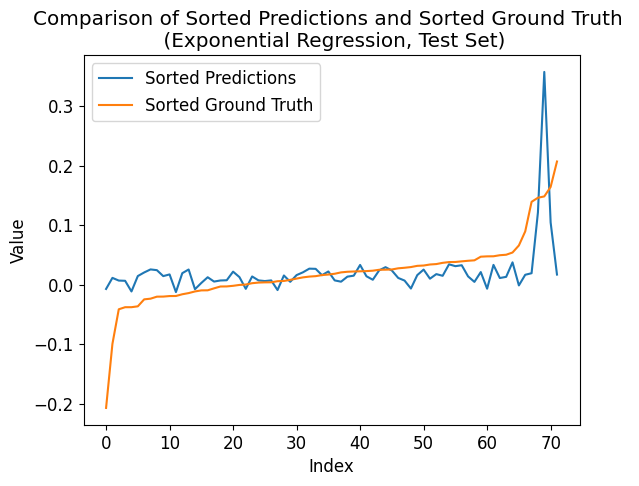

In [ ]:
plot_comparison(y_test, y_pred, 'Exponential Regression, Test Set')

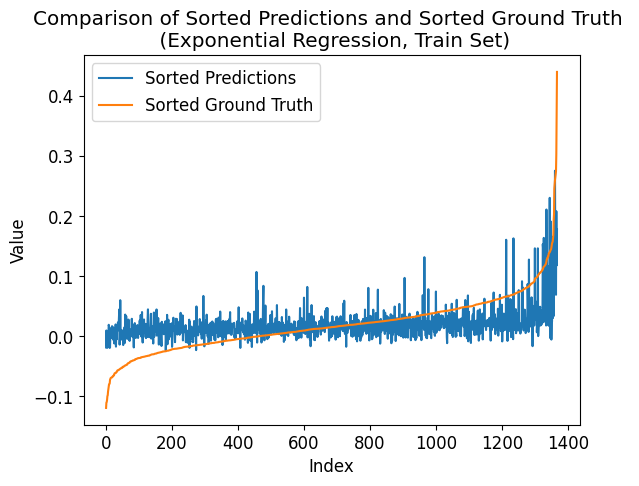

In [ ]:
plot_comparison(y_train, y_pred_, 'Exponential Regression, Train Set')

### Logistic regression

#### Divide train and val datasets

In [ ]:
# independent data
x = group_satcked_green

class_num = 480

# dependent data (labels/targets)
y = np.squeeze(stacked_red)
# print(np.max(y), np.min(y))

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max
# Generate class_num+1 evenly spaced intervals
intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
# print(intervals)
# Digitize the array to get the indices of the intervals
y_train = np.digitize(y_train, intervals) - 1
y_test = np.digitize(y_test, intervals) - 1
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# to see unique elements (see if we have all 0, 1,..., class_num-1 classes, better close to all)
unique_elements = np.unique(y_train)
print("Unique elements:", unique_elements)
print("Number of unique elements:", len(unique_elements))


x_train shape: (1368, 5)
y_train shape: (1368,)
x_test shape: (72, 5)
y_test shape: (72,)
Unique elements: [ 65  71  72  75  79  80  85  88  91  94  95  99 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 244 245 248 250 252 255 256 257 259 260
 262 265 268 269 270 274 278 297 304 335 341 346 350 353 357 378 429 479]
Number of unique elements: 180


#### Fit and predict

'multinomial' (default option for multi-calss) achieves better performance than 'ovr'.

In [ ]:
# fit
model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
# model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='ovr')

fit_result = model.fit(x_train, y_train)
print(fit_result.intercept_.shape, fit_result.coef_.shape)
# print("Coefficients:", model.coef_[0,:])
# print("Intercept:", model.intercept_[0])
print('--- --- ---')

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)

print('y_prob.shape:', y_prob.shape)
print(np.sum(y_prob, axis = 1))
# print(y_prob[0,:])

# Print the predicted class labels
print('y_pred:', y_pred)
print('y_test:', y_test)
print('y_pred shape:', y_pred.shape, 'y_test shape:', y_test.shape)
# Print the predicted probabilities
# print(y_prob)

(180,) (180, 5)
--- --- ---
y_prob.shape: (72, 180)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y_pred: [162 141 167 152 162 170 168 166 162 170 152 169 260 138 167 170 157 173
 162  99 166 152 162 163 162 378 152 190 140 162 162 166 162 162 190 140
 150 180 162 166 157 147 166 170 163 166 152 138 162 202 190 162 190 166
 174 190 171 162 190 170 162 162 190 140 147 162 158 138 162 158 199 184]
y_test: [153 188 169 125 156 138 190 188 168 182 167 158 261 179 183 152 126 170
 256   0 170 174 159 138 146 263 183 164 139 139 161 172 145 151 135 122
 141 181 173 166 188 125 172 307 193 155 156 180 151 275 143 177 172 162
 178 156 153 148 165 177 219 146 169 175 157 190 136  79 202 170 163 181]
y_pred shape: (72,) y_test shape: (72,)


#### Evaluate

##### Evaluate (normal)

In previous data division, I classify data into class_num (e.g., class_num = 160) intervals (histogram, by np.digitize). Here, evaluate the results with the same number of classes (e.g., class_num = 160).

Accuracy: 0.013888888888888888
Mean squared error: 1318.5694444444443
Correlation coefficient: 0.5212639786009838
Coefficient of determination (R-squared score, R2 score): 0.20414204593680674


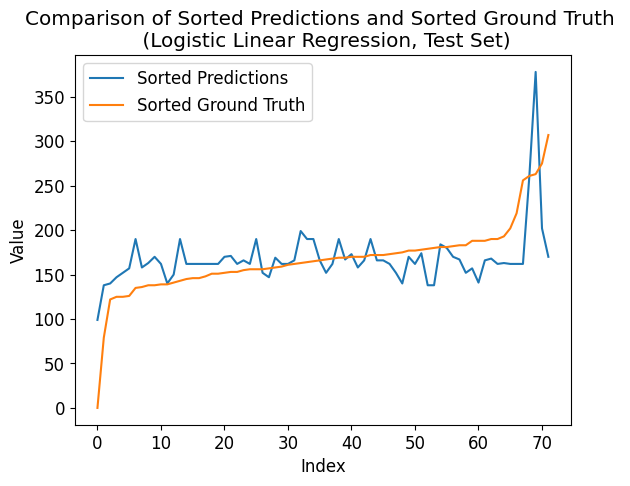

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:") # y_test doesn't include all classes, so confusion matrix is less than num_class by num_class
# print(cm)
# the columns represent the predicted labels (predictions)
# the rows represent the true labels (ground truth)
#                Predicted Class
#           |   Class 1   |   Class 2   |   Class 3   |
# -----------------------------------------------------
# True Class   |     TP1     |     FN1     |     FN1     |
# -----------------------------------------------------
# True Class   |     FP2     |     TP2     |     FN2     |
# -----------------------------------------------------
# True Class   |     FN3     |     FP3     |     TP3     |

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)


# Sort y_pred and y_test based on y_test
plot_comparison(y_test, y_pred, 'Logistic Linear Regression, Test Set')

Accuracy: 0.04751461988304093
Mean squared error: 1031.3523391812867
Correlation coefficient: 0.504515155991152
Coefficient of determination (R-squared score, R2 score): 0.16281542471269117


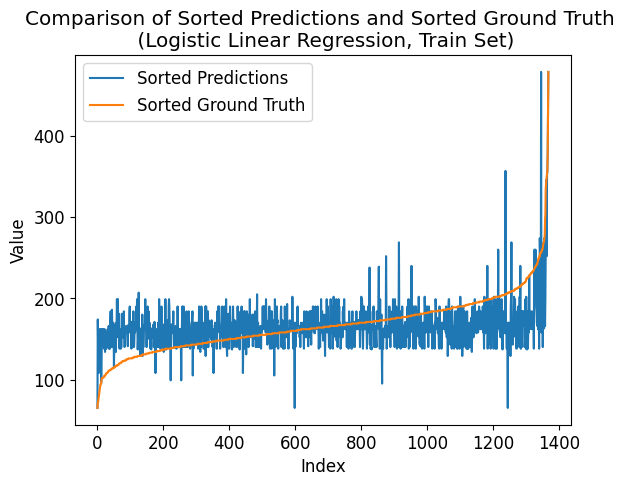

In [ ]:
# predict on train
# Use the trained model to make predictions
y_pred_ = model.predict(x_train)
# Alternatively, you can get the predicted probabilities for each class
y_prob_ = model.predict_proba(x_train)

accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy:", accuracy)

# cm = confusion_matrix(y_train, y_pred_)
# print("Confusion Matrix:")
# print(cm)
# the columns represent the predicted labels (predictions)
# the rows represent the true labels (ground truth)
#                Predicted Class
#              |   Class 1   |   Class 2   |   Class 3   |
# -----------------------------------------------------
# True Class   |     TP1     |     FN1     |     FN1     |
# -----------------------------------------------------
# True Class   |     FP2     |     TP2     |     FN2     |
# -----------------------------------------------------
# True Class   |     FN3     |     FP3     |     TP3     |

mse = mean_squared_error(y_train, y_pred_)
print("Mean squared error:", mse)

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)

r_squared = r2_score(y_train, y_pred_)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

plot_comparison(y_train, y_pred_, 'Logistic Linear Regression, Train Set')

##### Evaluate (reduced)

The model is based on classifying data into class_num (e.g., class_num = 160) intervals (histogram, by np.digitize). Here, evaluate the results a smaller number of classes (e.g., reduced_class_num = 16), that is, for the example of class_num = 160 and reduced_class_num = 16, classes 0, 1, ..., 15 become one class, i.e., 0; ...; classes 144, 145, ..., 159 become one class, i.e., 15.

In [ ]:
print("---- ---- ----")
# Define the boundaries for digitization
reduced_class_num = 16
intervals = np.arange(0, class_num + 1, class_num / reduced_class_num)
print(intervals)

y_train_digital = np.digitize(y_train, intervals) - 1
y_test_digital = np.digitize(y_test, intervals) - 1
y_pred_train_digital = np.digitize(y_pred_, intervals) - 1
y_pred_test_digital = np.digitize(y_pred, intervals) - 1
print(y_pred)
print(y_pred_test_digital)
mse = mean_squared_error(y_test_digital, y_pred_test_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_test_digital, y_test_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_test_digital, y_pred_test_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)
mse = mean_squared_error(y_train_digital, y_pred_train_digital)
print("Mean squared error:", mse)
correlation = np.corrcoef(y_pred_train_digital, y_train_digital)[0, 1]
print("Correlation coefficient:", correlation)
r_squared = r2_score(y_train_digital, y_pred_train_digital)
print("Coefficient of determination (R-squared score, R2 score):", r_squared)

---- ---- ----
[  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300. 330. 360. 390.
 420. 450. 480.]
[162 141 167 152 162 170 168 166 162 170 152 169 260 138 167 170 157 173
 162  99 166 152 162 163 162 378 152 190 140 162 162 166 162 162 190 140
 150 180 162 166 157 147 166 170 163 166 152 138 162 202 190 162 190 166
 174 190 171 162 190 170 162 162 190 140 147 162 158 138 162 158 199 184]
[ 5  4  5  5  5  5  5  5  5  5  5  5  8  4  5  5  5  5  5  3  5  5  5  5
  5 12  5  6  4  5  5  5  5  5  6  4  5  6  5  5  5  4  5  5  5  5  5  4
  5  6  6  5  6  5  5  6  5  5  6  5  5  5  6  4  4  5  5  4  5  5  6  6]
Mean squared error: 1.6805555555555556
Correlation coefficient: 0.45002269860598076
Coefficient of determination (R-squared score, R2 score): 0.09617180205415499
Mean squared error: 1.2814327485380117
Correlation coefficient: 0.46589994996224815
Coefficient of determination (R-squared score, R2 score): 0.10132445839159054


Fixing the reduced class number, I enumerate the original class number to see what a original class number is better.

In [ ]:
# independent data
x = group_satcked_green
# dependent data (labels/targets)
y = np.squeeze(stacked_red)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

reduced_class_num = 16
class_num_array = np.arange(reduced_class_num, reduced_class_num * 100 + 1, reduced_class_num)
# class_num_array = np.arange(reduced_class_num * 5, reduced_class_num * 40 + 1, reduced_class_num)
mse_test_list = []
correlation_test_list = []
r_squared_test_list = []
mse_train_list = []
correlation_train_list = []
r_squared_train_list = []

for class_num in class_num_array:
    print('---- ---- ----')
    print(f'class_num = {class_num}')

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

    # Generate class_num+1 evenly spaced intervals
    intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
    # print(intervals)
    # Digitize the array to get the indices of the intervals
    y_train = np.digitize(y_train, intervals) - 1
    y_test = np.digitize(y_test, intervals) - 1

    # to see unique elements (see if we have all 0, 1,..., class_num-1 classes, better close to all)
    unique_elements = np.unique(y_train)
    # print("Unique elements:", unique_elements)
    print("Number of unique elements:", len(unique_elements))

    model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, multi_class='multinomial')
    fit_result = model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_pred_ = model.predict(x_train)

    # Define the boundaries for digitization
    intervals = np.arange(0, class_num+1, class_num/16)
    print(intervals)

    y_train_digital = np.digitize(y_train, intervals) - 1
    y_test_digital = np.digitize(y_test, intervals) - 1
    y_pred_train_digital = np.digitize(y_pred_, intervals) - 1
    y_pred_test_digital = np.digitize(y_pred, intervals) - 1
    # print(y_pred)
    # print(y_pred_test_digital)
    print("test eval:")
    mse = mean_squared_error(y_test_digital, y_pred_test_digital)
    print("Mean squared error:", mse)
    correlation = np.corrcoef(y_pred_test_digital, y_test_digital)[0, 1]
    print("Correlation coefficient:", correlation)
    r_squared = r2_score(y_test_digital, y_pred_test_digital)
    print("Coefficient of determination (R-squared score, R2 score):", r_squared)
    mse_test_list.append(mse)
    correlation_test_list.append(correlation)
    r_squared_test_list.append(r_squared)

    print("train eval:")
    mse = mean_squared_error(y_train_digital, y_pred_train_digital)
    print("Mean squared error:", mse)
    correlation = np.corrcoef(y_pred_train_digital, y_train_digital)[0, 1]
    print("Correlation coefficient:", correlation)
    r_squared = r2_score(y_train_digital, y_pred_train_digital)
    print("Coefficient of determination (R-squared score, R2 score):", r_squared)
    mse_train_list.append(mse)
    correlation_train_list.append(correlation)
    r_squared_train_list.append(r_squared)

    plot_comparison(y_test, y_pred, f'Logistic Linear Regression Reduced Evaluation {class_num} to {reduced_class_num}, Test Set')
    plot_comparison(y_train, y_pred_, f'Logistic Linear Regression Reduced Evaluation {class_num} to {reduced_class_num}, Train Set')



Output hidden; open in https://colab.research.google.com to view.

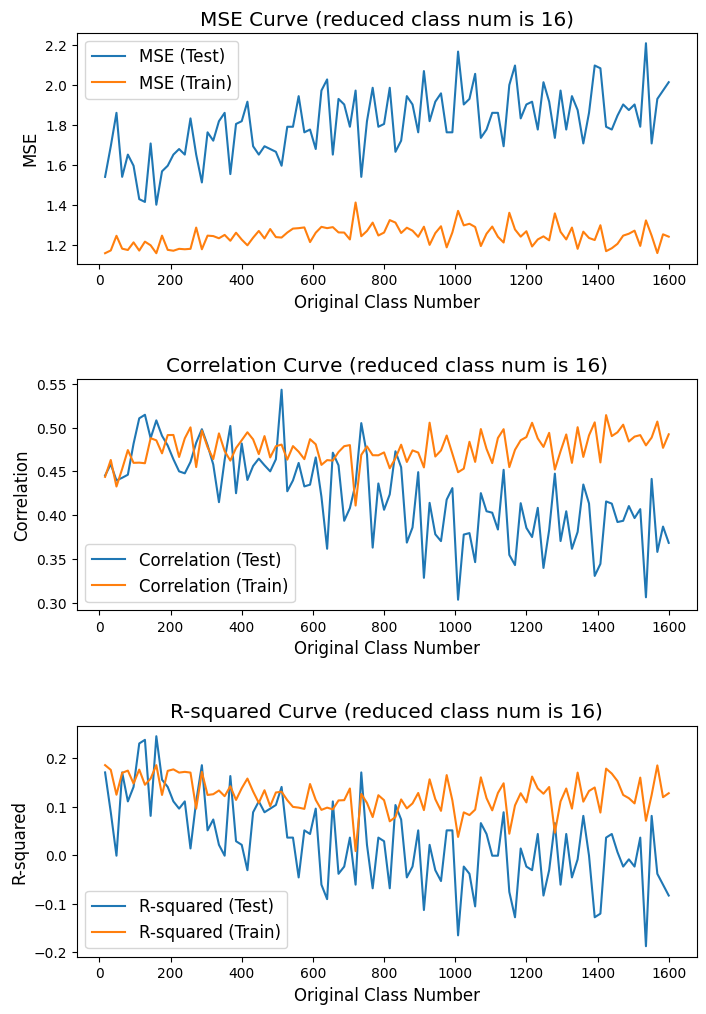

Max Index: 9
Max Original Class Num: 160


In [ ]:
# plot the trend figures of mse, correlation, and r2

# Create a figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plot MSE
ax1.plot(class_num_array, mse_test_list, label='MSE (Test)')
ax1.plot(class_num_array, mse_train_list, label='MSE (Train)')
ax1.set_ylabel('MSE')
ax1.set_xlabel('Original Class Number')
ax1.set_title(f'MSE Curve (reduced class num is {reduced_class_num})')
ax1.legend()

# Plot Correlation
ax2.plot(class_num_array, correlation_test_list, label='Correlation (Test)')
ax2.plot(class_num_array, correlation_train_list, label='Correlation (Train)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Original Class Number')
ax2.set_title(f'Correlation Curve (reduced class num is {reduced_class_num})')
ax2.legend()

# Plot R-squared
ax3.plot(class_num_array, r_squared_test_list, label='R-squared (Test)')
ax3.plot(class_num_array, r_squared_train_list, label='R-squared (Train)')
ax3.set_ylabel('R-squared')
ax3.set_xlabel('Original Class Number')
ax3.set_title(f'R-squared Curve (reduced class num is {reduced_class_num})')
ax3.legend()

# Increase the vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Adjust tick, label, title, and legend font sizes
plt.rcParams.update({'font.size': 12})
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax3.tick_params(labelsize=10)

# Save the figure
plt.savefig(f'mse_correlation_r2_trend_curve_reduced_eval_reduced_class_num_{reduced_class_num}.png', bbox_inches='tight')

# Show the figure
plt.show()

# Convert r_squared_test_list to a NumPy array
r_squared_test_array = np.array(r_squared_test_list)
# Find the index of the maximum value
max_index = np.argmax(r_squared_test_array)
# Get the corresponding class_num value
max_class_num = class_num_array[max_index]

# Print the index and corresponding class_num
print("Max Index:", max_index)
print("Max Original Class Num:", max_class_num)

#### Fit and predict (balanced weights)

balanced weights don't improve the fitting, but make it worse.

In [ ]:
# independent data
x = group_satcked_green

class_num = 48

# dependent data (labels/targets)
y = np.squeeze(stacked_red)
# print(np.max(y), np.min(y))

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)
# Calculate the minimum and maximum values
infinitesimal = np.finfo(float).eps
min_val = np.min(y) - infinitesimal # to guarantee to include min
max_val = np.max(y) + infinitesimal # to guarantee to include max
# Generate class_num+1 evenly spaced intervals
intervals = np.linspace(min_val, max_val, num=class_num+1) # num = class num + 1
# print(intervals)
# Digitize the array to get the indices of the intervals
y_train = np.digitize(y_train, intervals) - 1
y_test = np.digitize(y_test, intervals) - 1
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# to see unique elements (see if we have all 0, 1,..., class_num-1 classes, better close to all)
unique_elements = np.unique(y_train)
print("Unique elements:", unique_elements)
print("Number of unique elements:", len(unique_elements))

x_train shape: (1368, 5)
y_train shape: (1368,)
x_test shape: (72, 5)
y_test shape: (72,)
Unique elements: [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 29 30
 33 34 35 37 42 47]
Number of unique elements: 30


In [ ]:
# fit
model = linear_model.LogisticRegression(fit_intercept=True, max_iter=1000, class_weight='balanced', multi_class='multinomial')
fit_result = model.fit(x_train, y_train)
print(fit_result.intercept_.shape, fit_result.coef_.shape)

# predict
# Use the trained model to make predictions
y_pred = model.predict(x_test)
# Alternatively, you can get the predicted probabilities for each class
y_prob = model.predict_proba(x_test)
# Print the predicted class labels
print(y_pred, y_test)
print(y_pred.shape, y_test.shape)
# Print the predicted probabilities
# print(y_prob)

(30,) (30, 5)
[ 7  7 11  9  8 19 29 21 14 20 14 11 35 13 11 26 13 15 20  9 22 14  8 20
  8 37  9 25 29  8 17 21  8 15 19 10 19 26  8 19  9  8 29 26 25 11 14 13
  8 27 26 15 25 18  8 14 13 14 14 20 20 13 14  7  9 20 22 13  8 20 29 22] [15 18 16 12 15 13 19 18 16 18 16 15 26 17 18 15 12 17 25  0 17 17 15 13
 14 26 18 16 13 13 16 17 14 15 13 12 14 18 17 16 18 12 17 30 19 15 15 18
 15 27 14 17 17 16 17 15 15 14 16 17 21 14 16 17 15 19 13  7 20 17 16 18]
(72,) (72,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Evaluate (balanced weights)

Accuracy: 0.041666666666666664
Correlation coefficient: 0.4563969713481123


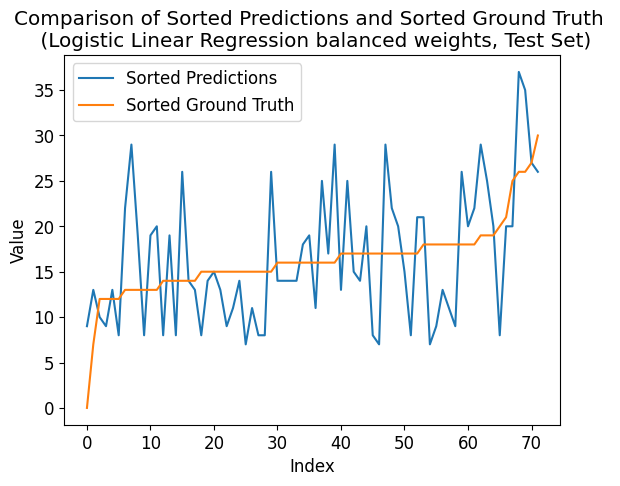

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)
# the columns represent the predicted labels (predictions)
# the rows represent the true labels (ground truth)
#                Predicted Class
#           |   Class 1   |   Class 2   |   Class 3   |
# -----------------------------------------------------
# True Class   |     TP1     |     FN1     |     FN1     |
# -----------------------------------------------------
# True Class   |     FP2     |     TP2     |     FN2     |
# -----------------------------------------------------
# True Class   |     FN3     |     FP3     |     TP3     |

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred, y_test)[0, 1]
print("Correlation coefficient:", correlation)


plot_comparison(y_test, y_pred, 'Logistic Linear Regression balanced weights, Test Set')


Accuracy: 0.059941520467836254
Correlation coefficient: 0.38806679746981715


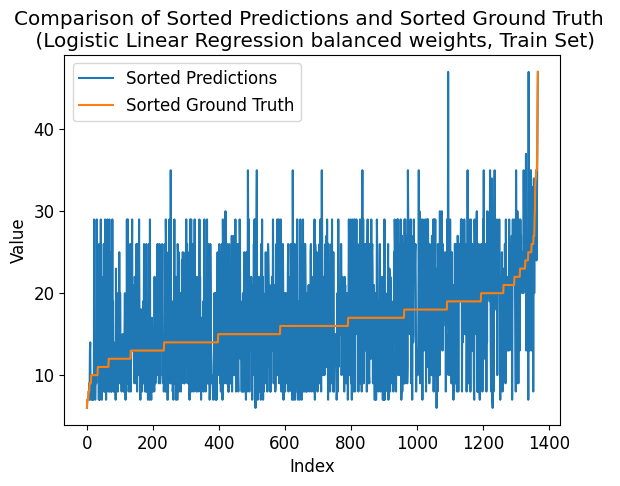

In [ ]:
# predict on train
# Use the trained model to make predictions
y_pred_ = model.predict(x_train)
# Alternatively, you can get the predicted probabilities for each class
y_prob_ = model.predict_proba(x_train)

accuracy = accuracy_score(y_train, y_pred_)
print("Accuracy:", accuracy)

# cm = confusion_matrix(y_train, y_pred_)
# print("Confusion Matrix:")
# print(cm)
# the columns represent the predicted labels (predictions)
# the rows represent the true labels (ground truth)
#                Predicted Class
#              |   Class 1   |   Class 2   |   Class 3   |
# -----------------------------------------------------
# True Class   |     TP1     |     FN1     |     FN1     |
# -----------------------------------------------------
# True Class   |     FP2     |     TP2     |     FN2     |
# -----------------------------------------------------
# True Class   |     FN3     |     FP3     |     TP3     |

# Calculate the correlation coefficient
correlation = np.corrcoef(y_pred_, y_train)[0, 1]
print("Correlation coefficient:", correlation)


plot_comparison(y_train, y_pred_, 'Logistic Linear Regression balanced weights, Train Set')


## Batch download files

In [ ]:
# batch download the plotted figures
# uncomment the code below to download figures if needed

'''
import glob

folder_path = '.'
# file_prefix = 'Comparison (Logistic Linear Regression Reduced Evaluation'
file_prefix = 'Comparison'

# Use glob to find all files with the given prefix in the folder
matching_files = glob.glob(f"{folder_path}/{file_prefix}*")
# print(matching_files)
# # Print the matching file names
# for file_path in matching_files:
#     print(file_path)

import zipfile

zip_filename = 'files.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Add files to the zip file
    for file_path in matching_files:
        zipf.write(file_path)

from google.colab import files
files.download(zip_filename)
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Delete generated files

Use the code cautiously.

In [ ]:
# # Specify the path to the root folder
# root_folder = '/content'

# # Get a list of all files in the root folder
# files = os.listdir(root_folder)

# files_to_delete = [file for file in files if file.endswith(".png")]

# for file_ in files_to_delete:
#     print(file_)

# # Iterate over the files and delete them
# for file in files_to_delete:
#     file_path = os.path.join(root_folder, file)
#     if os.path.isfile(file_path):
#         os.remove(file_path)